### Introduction ### 
Using historical data is pretty fun, but it often involves some grunt work. Sometimes data isn't available in a tabular format and needs to be manually transcribed so that it is ready for analysis. Today, I'm going to build off my first blog post and see if LLMs are able to transcribe values of a table for me. 

I'm going to continue working with the 1950 Census of Housing, linked [here](https://www.census.gov/library/publications/1953/dec/housing-vol-02.html). Some of the scans are very easy for me to read, and others are fuzzier. Let's see if GPT-4o is up for the test!

#### Warm-up exercise: an easy example #### 

Let's see if ChatGPT can read this clear scan. 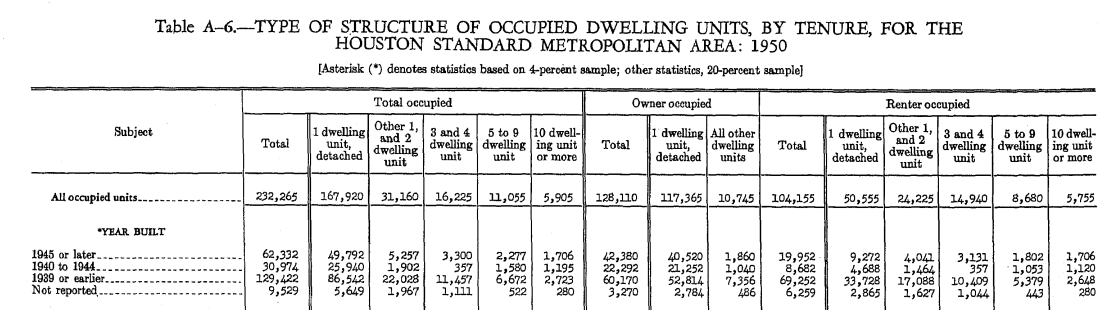

In [5]:
from openai import OpenAI
import os
import base64
import requests

from dotenv import load_dotenv
# Load API key
_ = load_dotenv()

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

client = OpenAI()

In [6]:

prompt = 'Describe this image'

base64_image = encode_image('img/img1.png')

response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": prompt},
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}"
              },
            },
          ],
        }
      ],
)

In [7]:
print(response.choices[0].message.content)

The image is a table titled "Table A-6.—TYPE OF STRUCTURE OF OCCUPIED DWELLING UNITS, BY TENURE, FOR THE HOUSTON STANDARD METROPOLITAN AREA: 1950." 

It categorizes occupied dwelling units based on structure type and tenure (owner-occupied or renter-occupied). The data is further divided by the year built for the following categories:

1. Total occupied
2. Owner occupied
3. Renter occupied

The columns show different types of dwelling units:
- 1 dwelling unit, detached
- Other 1 and 2 dwelling unit
- 3 and 4 dwelling unit
- 5 to 9 dwelling unit
- 10 dwelling unit or more

The table includes statistical figures for each category, with a total number of occupied units and subdivisions for each year built: 1945 or later, 1940 to 1944, 1939 or earlier, and Not reported. 

A note mentions that an asterisk (*) denotes statistics based on a 4-percent sample; other statistics are from a 20-percent sample.
